Liz Rightmire

N1 Health Challenge

November 2024

In [406]:
import pandas as pd
import numpy as np
import matplotlib
import geopandas as gpd
import geodatasets
from shapely.geometry import Point
import matplotlib.pyplot as plt
from shapely.wkt import loads

# Data

In [407]:
cities = pd.read_csv("Datasets/500cities/500cities.csv")
# Split the 'Place_TractID' column on the hyphen and take the first 5 digits of the second part
cities['County_FIPS'] = cities['Place_TractID'].str.split('-').str[1].str[:5]
# Remove rows where 'County_FIPS' is NaN
cities = cities.dropna(subset=['County_FIPS'])

# Convert 'County_FIPS' to an integer
cities['County_FIPS'] = cities['County_FIPS'].astype(int)
cities.head()

,StateAbbr,PlaceName,PlaceFIPS,TractFIPS,Place_TractID,Population2010,ACCESS2_CrudePrev,ACCESS2_Crude95CI,ARTHRITIS_CrudePrev,ARTHRITIS_Crude95CI,...,PHLTH_CrudePrev,PHLTH_Crude95CI,SLEEP_CrudePrev,SLEEP_Crude95CI,STROKE_CrudePrev,STROKE_Crude95CI,TEETHLOST_CrudePrev,TEETHLOST_Crude95CI,Geolocation,County_FIPS
0,AL,Birmingham,107000,1073000100,0107000-01073000100,3042,24.4,"(21.2, 27.8)",31.2,"(30.1, 32.2)",...,20.5,"(18.9, 22.2)",45.5,"(44.3, 46.5)",5.5,"( 5.0, 5.9)",28.9,"(23.7, 35.1)","(33.57943283260, -86.7228323926)",1073
1,AL,Birmingham,107000,1073000300,0107000-01073000300,2735,30.4,"(27.1, 33.7)",30.5,"(29.3, 31.7)",...,22.2,"(20.4, 24.0)",44.5,"(43.2, 45.7)",6.1,"( 5.5, 6.8)",32.9,"(25.5, 40.2)","(33.54282086860, -86.7524339780)",1073
2,AL,Birmingham,107000,1073000400,0107000-01073000400,3338,24.7,"(21.1, 28.5)",31.5,"(30.2, 32.9)",...,19.4,"(17.5, 21.4)",45.7,"(44.2, 47.0)",5.6,"( 5.0, 6.2)",28.6,"(22.0, 35.1)","(33.56324496330, -86.7640474064)",1073
3,AL,Birmingham,107000,1073000500,0107000-01073000500,2864,25.2,"(21.6, 29.0)",35.0,"(33.5, 36.4)",...,21.7,"(19.7, 23.9)",46.1,"(44.5, 47.4)",7.3,"( 6.5, 8.2)",34.0,"(24.4, 42.9)","(33.54424045940, -86.7749130719)",1073
4,AL,Birmingham,107000,1073000700,0107000-01073000700,2577,29.0,"(24.5, 33.8)",36.3,"(34.9, 37.7)",...,25.5,"(23.1, 28.0)",48.3,"(46.6, 49.7)",9.0,"( 8.1, 10.0)",43.2,"(33.2, 53.2)","(33.55254061390, -86.8016893706)",1073


In [408]:
places = pd.read_csv("Datasets/500cities/CDC_Places.csv")
places

/var/folders/nd/3yjvm85j3rq1vhh53yn6cy0r0000gn/T/ipykernel_39004/3011331644.py:1: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  places = pd.read_csv("Datasets/500cities/CDC_Places.csv")


,Year,StateAbbr,StateDesc,LocationName,DataSource,Category,Measure,Data_Value_Unit,Data_Value_Type,Data_Value,...,Low_Confidence_Limit,High_Confidence_Limit,TotalPopulation,TotalPop18plus,LocationID,CategoryID,MeasureId,DataValueTypeID,Short_Question_Text,Geolocation
0,2022,US,United States,NaN,BRFSS,Health Outcomes,Diagnosed diabetes among adults,%,Crude prevalence,12.0,...,11.8,12.2,333287557,260836730,59,HLTHOUT,DIABETES,CrdPrv,Diabetes,NaN
1,2022,AL,Alabama,Barbour,BRFSS,Disability,Hearing disability among adults,%,Crude prevalence,9.6,...,8.5,10.7,24706,19675,1005,DISABLT,HEARING,CrdPrv,Hearing Disability,POINT (-85.3928136383141 31.8698172860413)
2,2022,AL,Alabama,Calhoun,BRFSS,Health Outcomes,Stroke among adults,%,Age-adjusted prevalence,3.7,...,3.4,4.0,115788,91336,1015,HLTHOUT,STROKE,AgeAdjPrv,Stroke,POINT (-85.8257674379293 33.7714931264898)
3,2022,AL,Alabama,Chambers,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,5.6,...,5.1,6.0,34088,27025,1017,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-85.3917577489906 32.9141677822456)
4,2022,AL,Alabama,Clay,BRFSS,Health Outcomes,Stroke among adults,%,Crude prevalence,5.3,...,4.9,5.7,14198,11235,1027,HLTHOUT,STROKE,CrdPrv,Stroke,POINT (-85.8606604130173 33.2693085517833)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240881,2021,WI,Wisconsin,Polk,BRFSS,Health Outcomes,High blood pressure among adults,%,Crude prevalence,34.3,...,29.9,38.8,45709,36755,55095,HLTHOUT,BPHIGH,CrdPrv,High Blood Pressure,POINT (-92.4412755945684 45.4615053795217)
240882,2022,WI,Wisconsin,Trempealeau,BRFSS,Health Outcomes,Depression among adults,%,Age-adjusted prevalence,24.5,...,20.9,28.2,30899,23116,55121,HLTHOUT,DEPRESSION,AgeAdjPrv,Depression,POINT (-91.3584214806691 44.3039450660913)
240883,2022,WI,Wisconsin,Door,BRFSS,Prevention,Visited dentist or dental clinic in the past y...,%,Age-adjusted prevalence,64.3,...,60.1,67.8,30526,25807,55029,PREVENT,DENTAL,AgeAdjPrv,Dental Visit,POINT (-87.3114193001272 44.9500144269812)
240884,2022,WI,Wisconsin,Marathon,BRFSS,Disability,Self-care disability among adults,%,Crude prevalence,3.2,...,2.9,3.5,137958,107333,55073,DISABLT,SELFCARE,CrdPrv,Self-care Disability,POINT (-89.7588560093353 44.8983004431375)


In [409]:
access = pd.read_csv("Datasets/FoodEnvironmentAtlas/access.csv")
access

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,1001,AL,Autauga,18428.439690,17496.693040,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814080,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914186,0.353990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,13391.715500,18934.737810,41.391428,30.570505,43.224074,2414.618816,4750.905615,...,2661.350520,6.075311,114.722086,0.261887,189.621441,0.432866,27.720443,0.063280,1605.391465,3.664775
3139,56039,WY,Teton,6212.423697,6212.390430,-0.000535,29.174527,29.174370,1059.463554,1577.771012,...,736.174507,3.457192,53.489780,0.251196,32.482255,0.152542,8.468847,0.039771,460.434464,2.162273
3140,56041,WY,Uinta,4270.147119,4686.017653,9.739021,20.220414,22.189685,1518.415783,2054.179828,...,535.616715,2.536304,13.831709,0.065497,40.339658,0.191020,6.586104,0.031187,350.320469,1.658871
3141,56043,WY,Washakie,931.411647,931.411647,0.000000,10.915407,10.915407,233.628356,309.030331,...,35.474502,0.415733,6.366775,0.074614,5.006976,0.058678,0.000000,0.000000,34.160542,0.400334


In [410]:
insecurity = pd.read_csv("Datasets/FoodEnvironmentAtlas/insecurity.csv")
insecurity

,FIPS,State,County,FOODINSEC_12_14,FOODINSEC_15_17,CH_FOODINSEC_14_17,VLFOODSEC_12_14,VLFOODSEC_15_17,CH_VLFOODSEC_14_17,Unnamed: 9
0,1001,AL,Autauga,16.8,16.3,-0.5,7.2,7.1,-0.1,NaN
1,1003,AL,Baldwin,16.8,16.3,-0.5,7.2,7.1,-0.1,NaN
2,1005,AL,Barbour,16.8,16.3,-0.5,7.2,7.1,-0.1,NaN
3,1007,AL,Bibb,16.8,16.3,-0.5,7.2,7.1,-0.1,NaN
4,1009,AL,Blount,16.8,16.3,-0.5,7.2,7.1,-0.1,NaN
...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,14.0,13.2,-0.8,5.3,5.1,-0.2,NaN
3139,56039,WY,Teton,14.0,13.2,-0.8,5.3,5.1,-0.2,NaN
3140,56041,WY,Uinta,14.0,13.2,-0.8,5.3,5.1,-0.2,NaN
3141,56043,WY,Washakie,14.0,13.2,-0.8,5.3,5.1,-0.2,NaN


In [412]:
stores = pd.read_csv("Datasets/FoodEnvironmentAtlas/stores.csv")
stores['Food Stores per 1,000 people'] = stores['GROCPTH16'] + stores['SUPERCPTH16'] + stores['SPECSPTH16']
stores

,FIPS,State,County,GROC11,GROC16,PCH_GROC_11_16,GROCPTH11,GROCPTH16,PCH_GROCPTH_11_16,SUPERC11,...,SNAPSPTH12,SNAPSPTH17,PCH_SNAPSPTH_12_17,WICS11,WICS16,PCH_WICS_11_16,WICSPTH11,WICSPTH16,PCH_WICSPTH_11_16,"Food Stores per 1,000 people"
0,1001,AL,Autauga,5,3,-40.000000,0.090581,0.054271,-40.085748,1,...,0.674004,0.804747,19.397900,5.0,5.0,0.000000,0.090567,0.090511,-0.061543,0.090452
1,1003,AL,Baldwin,27,29,7.407407,0.144746,0.139753,-3.449328,6,...,0.725055,0.890836,22.864524,26.0,28.0,7.692307,0.139380,0.134802,-3.284727,0.303601
2,1005,AL,Barbour,6,4,-33.333333,0.219370,0.155195,-29.254287,0,...,1.280590,1.424614,11.246689,7.0,6.0,-14.285714,0.255942,0.232387,-9.203081,0.271592
3,1007,AL,Bibb,6,5,-16.666667,0.263794,0.220916,-16.254289,1,...,0.719122,0.801423,11.444711,6.0,5.0,-16.666666,0.263771,0.221474,-16.035471,0.265100
4,1009,AL,Blount,7,5,-28.571429,0.121608,0.086863,-28.571429,1,...,0.657144,0.692374,5.361034,8.0,8.0,0.000000,0.139000,0.139089,0.064332,0.104235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3138,56037,WY,Sweetwater,5,4,-20.000000,0.113603,0.090406,-20.419482,1,...,0.428936,0.625948,45.930131,4.0,4.0,0.000000,0.090948,0.090344,-0.664035,0.135608
3139,56039,WY,Teton,5,11,120.000000,0.232818,0.474547,103.827437,0,...,0.242215,0.343864,41.966780,3.0,3.0,0.000000,0.140095,0.129528,-7.542849,0.819672
3140,56041,WY,Uinta,3,2,-33.333333,0.143548,0.096567,-32.728180,1,...,0.554895,0.744084,34.094553,3.0,3.0,0.000000,0.143589,0.144991,0.976268,0.241418
3141,56043,WY,Washakie,2,2,0.000000,0.236407,0.244260,3.321935,0,...,0.669502,0.754382,12.677988,2.0,2.0,0.000000,0.236742,0.244858,3.428013,0.244260


In [495]:
# health datasets
diabetes = places[(places['MeasureId'] == 'DIABETES') & (places['Data_Value_Type'] == 'Age-adjusted prevalence')]
diabetes_filtered = diabetes[['StateDesc', 'LocationName', 'LocationID', 'Data_Value', 'Geolocation']]
diabetes_filtered.rename(columns = {'Data_Value' : 'Diabetes Rate (%)'}, inplace=True)
diabetes_filtered = diabetes_filtered.dropna(subset=['Geolocation'])
diabetes_filtered

obesity = places[(places['MeasureId'] == 'OBESITY') & (places['Data_Value_Type'] == 'Age-adjusted prevalence')]
obesity_filtered = obesity[['LocationID', 'Data_Value']]
obesity_filtered.rename(columns = {'Data_Value' : 'Obesity Rate (%)'}, inplace=True)
#obesity_filtered = obesity_filtered.dropna(subset=['Geolocation'])

health_merged = pd.merge(diabetes_filtered,
                         obesity_filtered,
                         how = "inner",
                         on = "LocationID"
                         )

# Clean up FIPS code -- append 0s if not 5 digits in length
#health_merged['LocationID'] = health_merged['LocationID'].apply(lambda x: f"0{x}" if len(str(x)) == 4 else str(x))
health_merged.rename(columns = {'LocationID' : 'FIPS', 
                                'StateDesc' : 'State',
                                'LocationName' : 'County'
                                }, inplace=True)

# Convert Geolocation to geometry if stored as WKT strings
health_merged['geometry'] = health_merged['Geolocation'].apply(loads)

health_merged

/var/folders/nd/3yjvm85j3rq1vhh53yn6cy0r0000gn/T/ipykernel_39004/3651254120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diabetes_filtered.rename(columns = {'Data_Value' : 'Diabetes Rate (%)'}, inplace=True)
/var/folders/nd/3yjvm85j3rq1vhh53yn6cy0r0000gn/T/ipykernel_39004/3651254120.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  obesity_filtered.rename(columns = {'Data_Value' : 'Obesity Rate (%)'}, inplace=True)


,State,County,FIPS,Diabetes Rate (%),Geolocation,Obesity Rate (%),geometry
0,Alaska,Skagway,2230,8.0,POINT (-135.336028290736 59.5592737178809),33.0,POINT (-135.336028290736 59.5592737178809)
1,Alaska,Yukon-Koyukuk,2290,13.4,POINT (-151.390098989755 65.5085661031514),39.5,POINT (-151.390098989755 65.5085661031514)
2,Arkansas,Clark,5019,14.3,POINT (-93.1767308539705 34.0510757211807),40.4,POINT (-93.1767308539705 34.0510757211807)
3,California,Alpine,6003,8.8,POINT (-119.820667930537 38.5974751291386),29.9,POINT (-119.820667930537 38.5974751291386)
4,Alabama,Pike,1109,13.7,POINT (-85.9407627085231 31.8027535253528),40.6,POINT (-85.9407627085231 31.8027535253528)
...,...,...,...,...,...,...,...
3139,Wisconsin,Waushara,55137,9.8,POINT (-89.2429754089233 44.1131612071157),41.8,POINT (-89.2429754089233 44.1131612071157)
3140,Wyoming,Sweetwater,56037,9.4,POINT (-108.879886957441 41.6596981373813),36.3,POINT (-108.879886957441 41.6596981373813)
3141,Wisconsin,Chippewa,55017,8.4,POINT (-91.2799726300936 45.0694319590576),40.0,POINT (-91.2799726300936 45.0694319590576)
3142,Wisconsin,Oneida,55085,8.3,POINT (-89.5218417475047 45.7055064731892),38.5,POINT (-89.5218417475047 45.7055064731892)


In [481]:
#obesity = places[(places['MeasureId'] == 'OBESITY') & (places['Data_Value_Type'] == 'Age-adjusted prevalence')]
#obesity.sort_values('LocationID')

#diabetes = places[places['MeasureId'] == 'DIABETES']
#diabetes

In [496]:
# Food Atlas Merge
atlas_merged = pd.merge(access[["FIPS", "LACCESS_LOWI15", "LACCESS_HHNV15"]], 
                        stores[["FIPS", "Food Stores per 1,000 people"]],
                       on= "FIPS", 
                       how="inner")

# Rename specific columns
atlas_merged = atlas_merged.rename(columns={'LACCESS_LOWI15': 'Low income & low access to store (2015, count)',
                                            'LACCESS_HHNV15' : 'Households with no car & low access to store, (2015, count)',
                                            })

atlas_merged

,FIPS,"Low income & low access to store (2015, count)","Households with no car & low access to store, (2015, count)","Food Stores per 1,000 people"
0,1001,6543.676824,677.672769,0.090452
1,1003,9886.831137,1394.162766,0.303601
2,1005,2948.790251,425.144927,0.271592
3,1007,596.162829,224.388125,0.265100
4,1009,1650.959482,719.931444,0.104235
...,...,...,...,...
3138,56037,4750.905615,359.608360,0.135608
3139,56039,1577.771012,48.474161,0.819672
3140,56041,2054.179828,211.630840,0.241418
3141,56043,309.030331,42.030853,0.244260


In [497]:
# final merge
all_data = pd.merge(health_merged, 
                    atlas_merged,
                    on= "FIPS", 
                    how="inner")

all_data

,State,County,FIPS,Diabetes Rate (%),Geolocation,Obesity Rate (%),geometry,"Low income & low access to store (2015, count)","Households with no car & low access to store, (2015, count)","Food Stores per 1,000 people"
0,Alaska,Skagway,2230,8.0,POINT (-135.336028290736 59.5592737178809),33.0,POINT (-135.336028290736 59.5592737178809),0.488926,2.503659,0.000000
1,Alaska,Yukon-Koyukuk,2290,13.4,POINT (-151.390098989755 65.5085661031514),39.5,POINT (-151.390098989755 65.5085661031514),2779.799148,1116.944260,1.662971
2,Arkansas,Clark,5019,14.3,POINT (-93.1767308539705 34.0510757211807),40.4,POINT (-93.1767308539705 34.0510757211807),4933.730696,314.650723,0.133038
3,California,Alpine,6003,8.8,POINT (-119.820667930537 38.5974751291386),29.9,POINT (-119.820667930537 38.5974751291386),146.579098,9.321428,0.000000
4,Alabama,Pike,1109,13.7,POINT (-85.9407627085231 31.8027535253528),40.6,POINT (-85.9407627085231 31.8027535253528),2074.066321,563.044138,0.240855
...,...,...,...,...,...,...,...,...,...,...
3126,Wisconsin,Waushara,55137,9.8,POINT (-89.2429754089233 44.1131612071157),41.8,POINT (-89.2429754089233 44.1131612071157),113.752167,417.026336,0.372949
3127,Wyoming,Sweetwater,56037,9.4,POINT (-108.879886957441 41.6596981373813),36.3,POINT (-108.879886957441 41.6596981373813),4750.905615,359.608360,0.135608
3128,Wisconsin,Chippewa,55017,8.4,POINT (-91.2799726300936 45.0694319590576),40.0,POINT (-91.2799726300936 45.0694319590576),3154.358722,571.594721,0.204509
3129,Wisconsin,Oneida,55085,8.3,POINT (-89.5218417475047 45.7055064731892),38.5,POINT (-89.5218417475047 45.7055064731892),1101.222030,308.121696,0.593656


# Cities Map

Merged

In [414]:
# select columns from cities
cities_filtered = cities[['County_FIPS', 'DIABETES_Crude95CI', 'PlaceName', 'Geolocation']]
#cities_filtered = cities_filtered.drop_duplicates(subset=['County_FIPS', 'PlaceName'])


# select columns from access
access_filtered = access[["FIPS", "County", "PCT_LACCESS_LOWI15", "PCT_LACCESS_HHNV15"]]

# Merge the cities DataFrame with the Food Atlas DataFrame on FIPS
merged_data = pd.merge(cities_filtered, access_filtered, 
                       left_on= "County_FIPS", 
                       right_on = "FIPS",
                       how="inner")

# Clean and preprocess Geolocation
cities['Geolocation'] = cities['Geolocation'].str.strip("()")
cities['Geolocation'] = cities['Geolocation'].apply(lambda x: tuple(map(float, x.split(", "))))
cities['latitude'] = cities['Geolocation'].apply(lambda x: x[0])
cities['longitude'] = cities['Geolocation'].apply(lambda x: x[1])


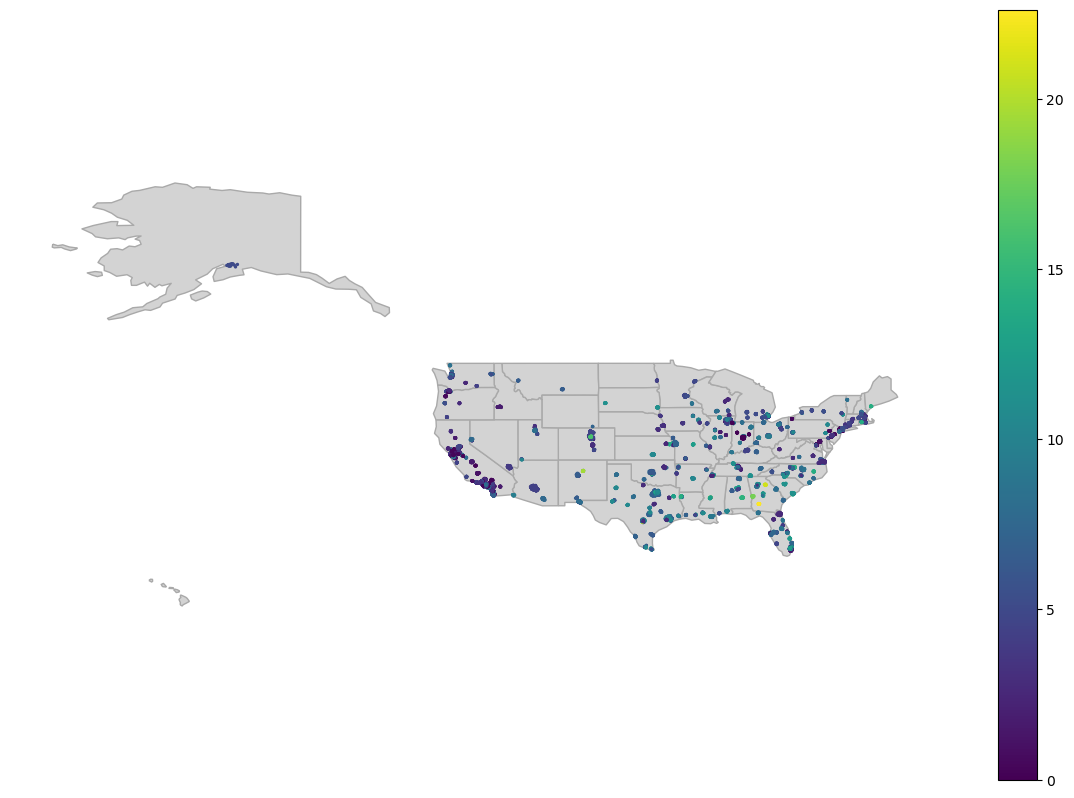

In [415]:
# Load the dataset
states = gpd.read_file("states/states.shp")

# Create Point geometry
merged_data['geometry'] = cities.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)

# Convert cities DataFrame into a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_data, geometry='geometry')

# Plot the USA map and overlay the population data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot USA boundaries
states.plot(ax=ax, color='lightgray', edgecolor='darkgrey')

# Overlay the cities data
gdf.plot(column='PCT_LACCESS_LOWI15', 
         cmap='viridis', 
         legend=True, 
         #legend_kwds={'label': 'Low income & low access to store (%), 2015', 'orientation': 'horizontal'},
         ax=ax, 
         markersize=2)

# Customize the plot
plt.axis("off")
plt.show()

# Health Map

In [498]:
# Drop rows with missing or invalid Geolocation values
#diabetes_filtered = diabetes_filtered.dropna(subset=['Geolocation'])

# Convert Geolocation to geometry if stored as WKT strings
#diabetes_filtered['geometry'] = diabetes_filtered['Geolocation'].apply(loads)

# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(all_data, geometry='geometry')

# Ensure the CRS is set (e.g., EPSG:4326 for lat/lon)
gdf.set_crs("EPSG:4326", inplace=True)

,State,County,FIPS,Diabetes Rate (%),Geolocation,Obesity Rate (%),geometry,"Low income & low access to store (2015, count)","Households with no car & low access to store, (2015, count)","Food Stores per 1,000 people"
0,Alaska,Skagway,2230,8.0,POINT (-135.336028290736 59.5592737178809),33.0,POINT (-135.33603 59.55927),0.488926,2.503659,0.000000
1,Alaska,Yukon-Koyukuk,2290,13.4,POINT (-151.390098989755 65.5085661031514),39.5,POINT (-151.3901 65.50857),2779.799148,1116.944260,1.662971
2,Arkansas,Clark,5019,14.3,POINT (-93.1767308539705 34.0510757211807),40.4,POINT (-93.17673 34.05108),4933.730696,314.650723,0.133038
3,California,Alpine,6003,8.8,POINT (-119.820667930537 38.5974751291386),29.9,POINT (-119.82067 38.59748),146.579098,9.321428,0.000000
4,Alabama,Pike,1109,13.7,POINT (-85.9407627085231 31.8027535253528),40.6,POINT (-85.94076 31.80275),2074.066321,563.044138,0.240855
...,...,...,...,...,...,...,...,...,...,...
3126,Wisconsin,Waushara,55137,9.8,POINT (-89.2429754089233 44.1131612071157),41.8,POINT (-89.24298 44.11316),113.752167,417.026336,0.372949
3127,Wyoming,Sweetwater,56037,9.4,POINT (-108.879886957441 41.6596981373813),36.3,POINT (-108.87989 41.6597),4750.905615,359.608360,0.135608
3128,Wisconsin,Chippewa,55017,8.4,POINT (-91.2799726300936 45.0694319590576),40.0,POINT (-91.27997 45.06943),3154.358722,571.594721,0.204509
3129,Wisconsin,Oneida,55085,8.3,POINT (-89.5218417475047 45.7055064731892),38.5,POINT (-89.52184 45.70551),1101.222030,308.121696,0.593656


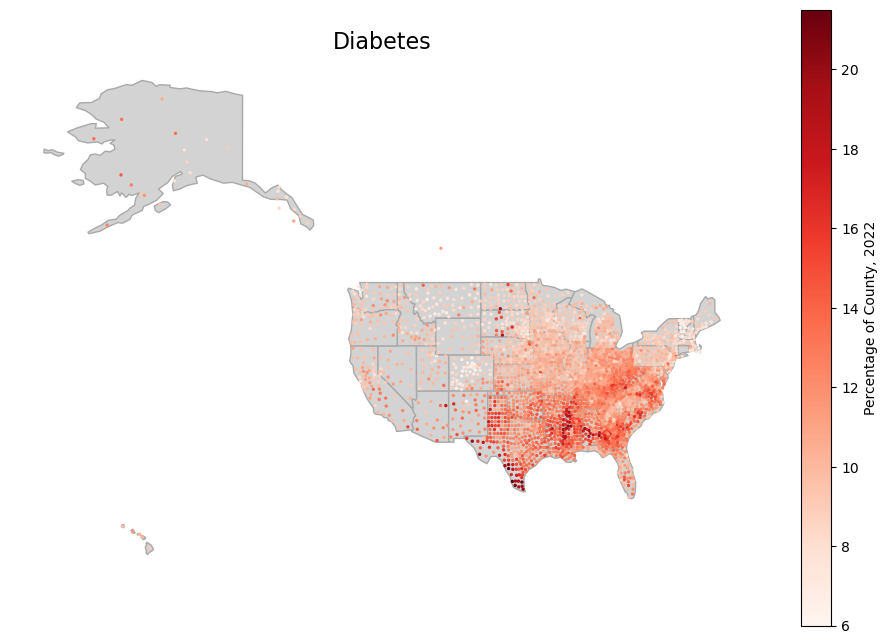

In [499]:
# Load a basemap (e.g., USA states)
states = gpd.read_file("states/states.shp")

# Ensure the CRS matches
states = states.to_crs(gdf.crs)

# Plot the basemap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
states.plot(ax=ax, color='lightgray', edgecolor='darkgrey')  # Plot state boundaries

# Overlay the points
gdf.plot(
    column='Diabetes Rate (%)',
    cmap='Reds',
    legend=True,
    markersize=2,
    legend_kwds={'label': 'Percentage of County, 2022', 'orientation': 'vertical'},
    ax=ax
)

# Add title and styling
ax.set_title("Diabetes", fontsize=16)
ax.axis('off')
plt.show()

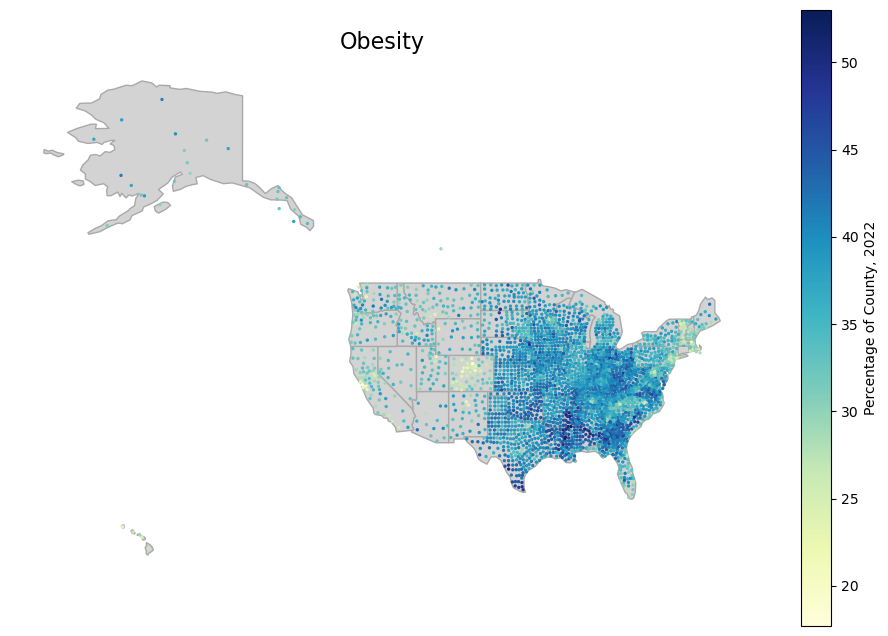

In [500]:
# Convert Geolocation to geometry if stored as WKT strings
#obesity_filtered['geometry'] = obesity_filtered['Geolocation'].apply(loads)

# Convert to GeoDataFrame
#gdf = gpd.GeoDataFrame(obesity_filtered, geometry='geometry')

# Ensure the CRS is set (e.g., EPSG:4326 for lat/lon)
#gdf.set_crs("EPSG:4326", inplace=True)

# Load a basemap (e.g., USA states)
#states = gpd.read_file("states/states.shp")

# Ensure the CRS matches
#states = states.to_crs(gdf.crs)

# Plot the basemap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
states.plot(ax=ax, color='lightgray', edgecolor='darkgrey')

# Overlay the points
gdf.plot(
    column='Obesity Rate (%)',
    cmap='YlGnBu',
    legend=True,
    markersize=2,
    legend_kwds={'label': 'Percentage of County, 2022', 'orientation': 'vertical'},
    ax=ax
)

# Add title and styling
ax.set_title("Obesity", fontsize=16)
ax.axis('off')
plt.show()

# Priority List

In [420]:
# big merge
#merged_atlas = pd.merge(access[["FIPS",  "State", "County", "PCT_LACCESS_LOWI15", "LACCESS_LOWI15", "PCT_LACCESS_HHNV15",  "LACCESS_HHNV15"]], 
#                        stores[["FIPS", "Food Stores per 1,000 people"]],
#                       on= "FIPS", 
#                       how="inner")

# Rename specific columns
#merged_atlas = merged_atlas.rename(columns={'LACCESS_LOWI15': 'Low income & low access to store (2015, count)',
#                                            'PCT_LACCESS_LOWI15': 'Low income & low access to store (2015, %)', 
#                                            'LACCESS_HHNV15' : 'Households with no car & low access to store, (2015, count)',
#                                            'PCT_LACCESS_HHNV15': 'Households with no car & low access to store (2015, %)',
#                                            })


In [502]:
# Sort the DataFrame by 'food_insec' in descending order and get the top 20 counties
top_20_insecurity = all_data.sort_values(by='Low income & low access to store (2015, count)', ascending=False).head(20)
column_order = ['County', 'State', 'Low income & low access to store (2015, count)', 'Households with no car & low access to store, (2015, count)', 'Food Stores per 1,000 people', 'Obesity Rate (%)', 'Diabetes Rate (%)']

# Display the top 20 counties
top_20_insecurity[column_order].round(2)

,County,State,"Low income & low access to store (2015, count)","Households with no car & low access to store, (2015, count)","Food Stores per 1,000 people",Obesity Rate (%),Diabetes Rate (%)
2690,Harris,Texas,259479.52,12877.85,0.23,35.2,14.5
2473,Bexar,Texas,182902.18,13708.14,0.15,37.3,15.4
186,Maricopa,Arizona,167933.02,13845.22,0.18,32.7,10.4
2723,Dallas,Texas,165055.78,10306.76,0.21,34.8,13.2
2632,Hidalgo,Texas,164640.60,5282.22,0.16,47.6,19.2
142,San Bernardino,California,162904.57,7788.87,0.20,35.1,12.4
114,Los Angeles,California,161790.52,8300.32,0.28,26.2,11.4
106,Riverside,California,149950.85,7404.12,0.21,34.0,10.5
2630,Tarrant,Texas,145321.90,8384.24,0.18,37.7,12.4
2399,Shelby,Tennessee,104909.24,7931.31,0.25,42.6,14.8


# Food Atlas with Coordinates

In [422]:
#counties = pd.read_csv("us_county_latlng.csv")
#counties

,fips_code,name,lng,lat
0,1059,Franklin,-87.843283,34.442381
1,13111,Fannin,-84.319296,34.864126
2,19109,Kossuth,-94.206898,43.204140
3,40115,Ottawa,-94.810589,36.835878
4,42115,Susquehanna,-75.800905,41.821277
...,...,...,...,...
3228,12029,Dixie,-83.158705,29.608068
3229,18017,Cass,-86.346207,40.761660
3230,26091,Lenawee,-84.066412,41.894694
3231,72003,Aguada,-67.175247,18.360392


In [423]:
# merge time
# cite: https://gist.github.com/russellsamora/12be4f9f574e92413ea3f92ce1bc58e6
#merged_with_geo = pd.merge(merged_atlas, 
#                        counties,
#                        left_on= "FIPS", 
#                        right_on = "fips_code",
#                        how="inner")

#merged_with_geo

,FIPS,State,County,"Low income & low access to store (2015, %)","Low income & low access to store (2015, count)","Households with no car & low access to store (2015, %)","Households with no car & low access to store, (2015, count)","Food Stores per 1,000 people",fips_code,name,lng,lat
0,1001,AL,Autauga,11.991125,6543.676824,3.351332,677.672769,0.090452,1001,Autauga,-86.642900,32.535142
1,1003,AL,Baldwin,5.424427,9886.831137,1.905114,1394.162766,0.303601,1003,Baldwin,-87.722745,30.727825
2,1005,AL,Barbour,10.739667,2948.790251,4.329378,425.144927,0.271592,1005,Barbour,-85.391068,31.870090
3,1007,AL,Bibb,2.601627,596.162829,2.821427,224.388125,0.265100,1007,Bibb,-87.126814,32.998376
4,1009,AL,Blount,2.880150,1650.959482,3.336414,719.931444,0.104235,1009,Blount,-86.567006,33.980871
...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,WY,Sweetwater,10.845331,4750.905615,2.182752,359.608360,0.135608,56037,Sweetwater,-108.879388,41.659762
3138,56039,WY,Teton,7.409463,1577.771012,0.540222,48.474161,0.819672,56039,Teton,-110.589698,43.934564
3139,56041,WY,Uinta,9.727151,2054.179828,2.759922,211.630840,0.241418,56041,Uinta,-110.547405,41.287497
3140,56043,WY,Washakie,3.621591,309.030331,1.203633,42.030853,0.244260,56043,Washakie,-107.682315,43.904378


KeyError: 'Households with no car & low access to store, (count, 2015)'

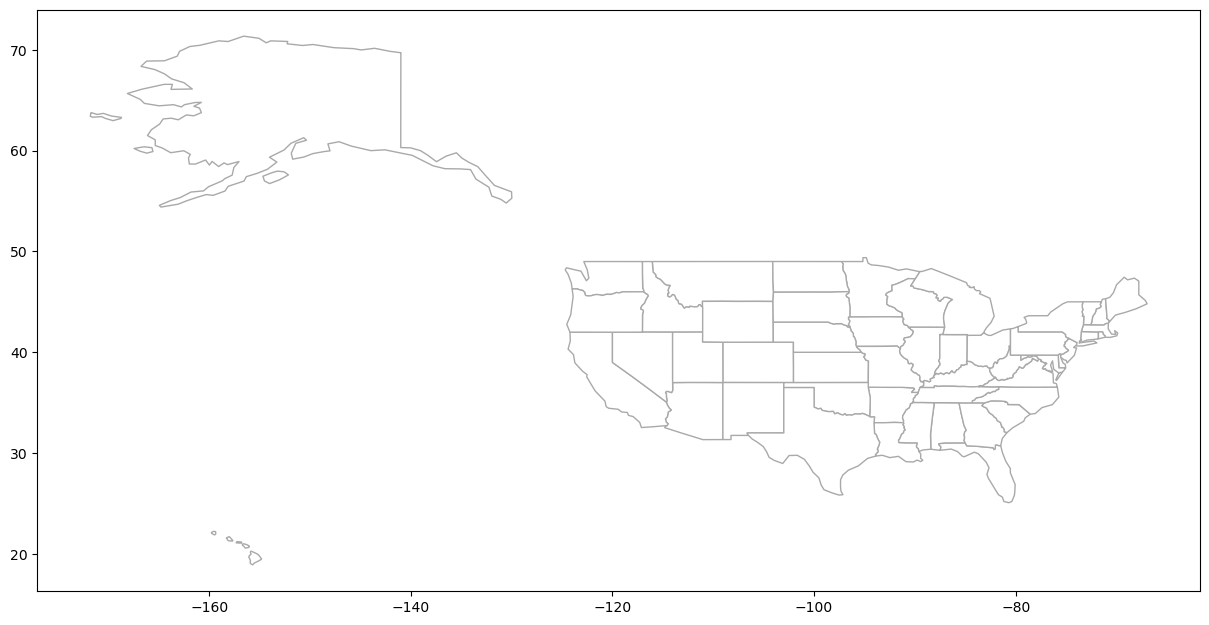

In [424]:
# Create Point geometry
merged_with_geo['geometry'] = merged_with_geo.apply(lambda row: Point(row['lng'], row['lat']), axis=1)

# Convert cities DataFrame into a GeoDataFrame
gdf = gpd.GeoDataFrame(merged_with_geo, geometry='geometry')

# Plot the USA map and overlay the population data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot USA boundaries
states.plot(ax=ax, color='white', edgecolor='darkgrey')

# Overlay the cities data
gdf.plot(column='Households with no car & low access to store, (count, 2015)', 
         cmap='gist_heat_r', 
         legend=True, 
         legend_kwds={'label': 'Count per County, 2015', 'orientation': 'vertical'},
         ax=ax, 
         markersize=5)

# Customize the plot
ax.set_title("No Car and Low Access to Store", fontsize=16)
plt.axis("off")
plt.show()

KeyError: 'Households with no car & low access to store, (count, 2015)'

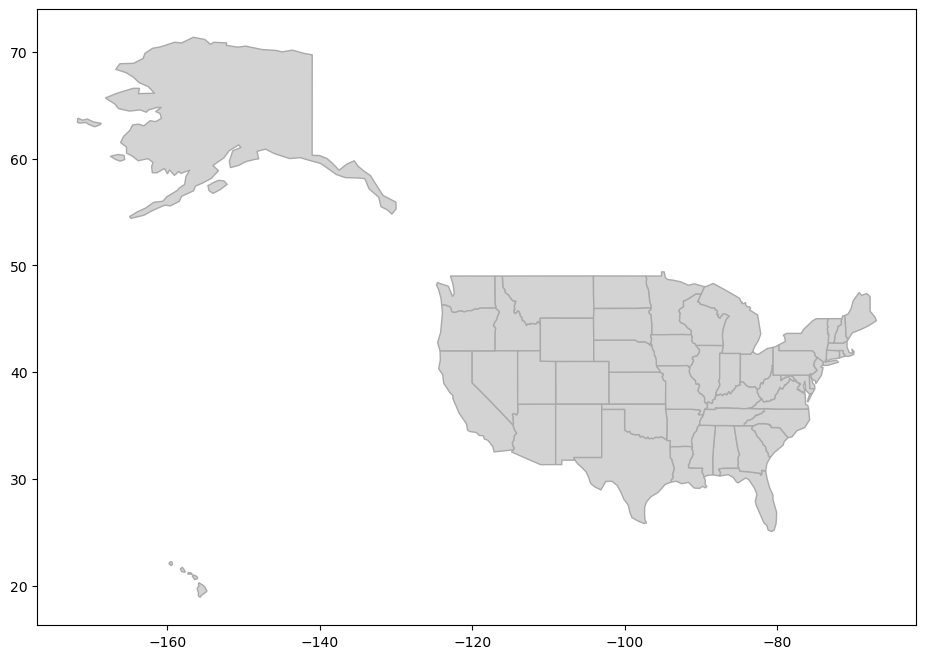

In [503]:
# Plot the basemap
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
states.plot(ax=ax, color='lightgray', edgecolor='darkgrey')

# Overlay the points
gdf.plot(
    column='Households with no car & low access to store, (count, 2015)',
    cmap='YlGnBu',
    legend=True,
    markersize=2,
    legend_kwds={'label': 'Percentage of County, 2022', 'orientation': 'vertical'},
    ax=ax
)

# Add title and styling
ax.set_title("Obesity", fontsize=16)
ax.axis('off')
plt.show()

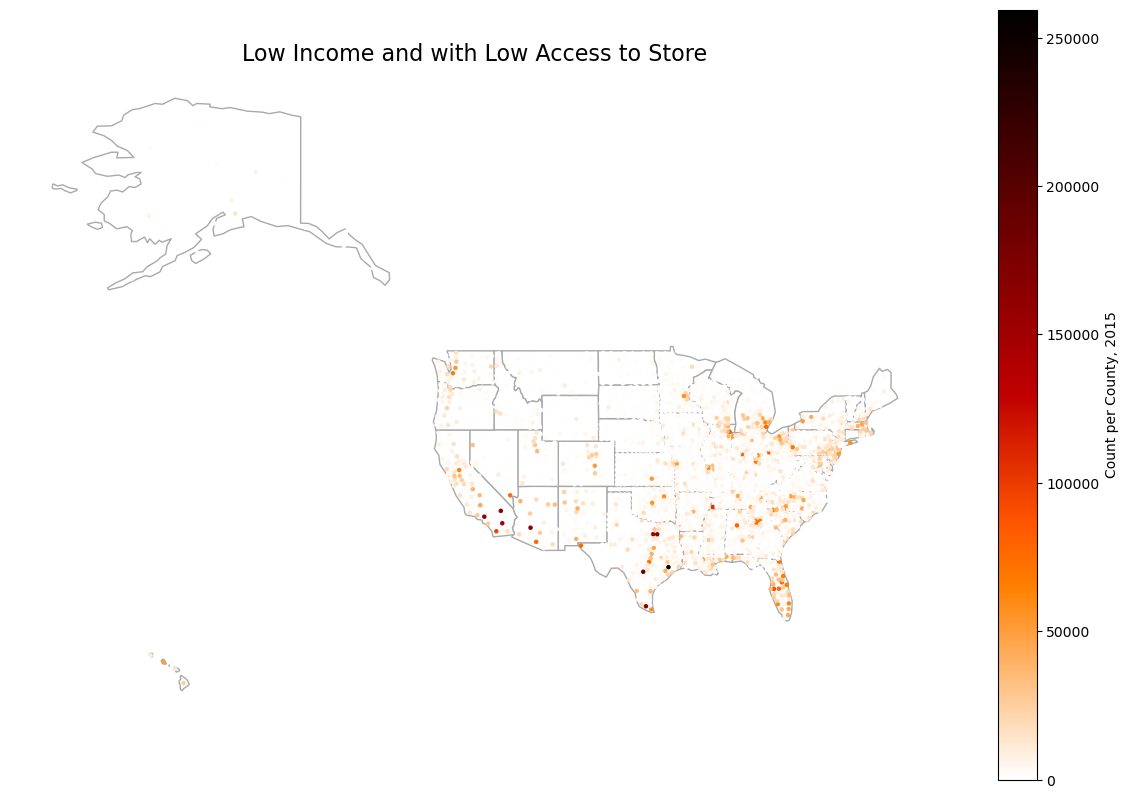

In [507]:
# Plot the USA map and overlay the population data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot USA boundaries
states.plot(ax=ax, color='white', edgecolor='darkgrey')

# Overlay the cities data
gdf.plot(column='Low income & low access to store (2015, count)', 
         cmap='gist_heat_r', 
         legend=True, 
         legend_kwds={'label': 'Count per County, 2015', 'orientation': 'vertical'},
         ax=ax, 
         markersize=5)

# Customize the plot
ax.set_title("Low Income and with Low Access to Store", fontsize=16)
plt.axis("off")
plt.show()

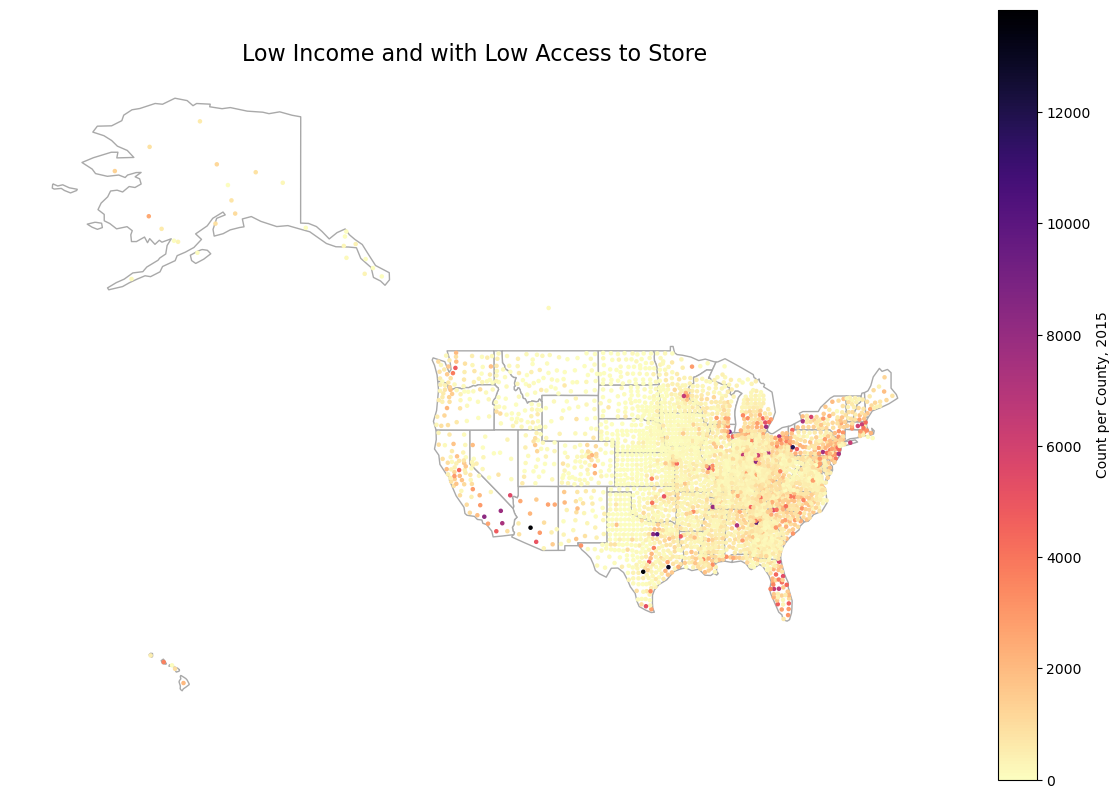

In [510]:
# Plot the USA map and overlay the population data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Plot USA boundaries
states.plot(ax=ax, color='white', edgecolor='darkgrey')

# Overlay the cities data
gdf.plot(column='Households with no car & low access to store, (2015, count)', 
         cmap='magma_r', 
         legend=True, 
         legend_kwds={'label': 'Count per County, 2015', 'orientation': 'vertical'},
         ax=ax, 
         markersize=5)

# Customize the plot
ax.set_title("Low Income and with Low Access to Store", fontsize=16)
plt.axis("off")
plt.show()